In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc,Rectangle,ConnectionPatch

In [8]:
data = pd.read_excel("Shots.xlsx")
data

,Name,Situation,Result,Team,XSTART,YSTART,XEND,YEND
0,Icardi,OpenPlay,Saved,PSG,113,40,116,43
1,Icardi,Free Kick,Saved,PSG,96,51,117,44
2,Icardi,OpenPlay,Goal,PSG,115,41,119,37
3,Icardi,OpenPlay,Goal,PSG,116,39,119,44
4,Icardi,Free Kick,Goal,PSG,95,53,119,36
5,Icardi,Penalty,Goal,PSG,112,40,119,43
6,Icardi,Penalty,Goal,PSG,112,40,119,42
7,Icardi,Corner,Saved,PSG,118,43,115,39
8,Icardi,Corner,Goal,PSG,117,43,119,40
9,Icardi,Corner,Goal,PSG,118,42,119,41


In [9]:
def draw_pitch(ax, colour = None, edge = 'black'):
    
    Background = Rectangle([-10,-10], width = 135, height = 95, fill = False)
    # Pitch Outline and Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, edgecolor = edge, fill = False)
    
    if colour:
        Background = Rectangle([-10,-10], width = 135, height = 95, color = colour)
        # Pitch Outline and Centre Line
        Pitch = Rectangle([0,0], width = 120, height = 80, edgecolor = edge, facecolor = colour)
    
    # Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,18], width = 18, height = 44, edgecolor = edge, fill = False)
    RightPenalty = Rectangle([102,18], width = 18, height = 44, edgecolor = edge, fill = False)
    midline = ConnectionPatch([60,0], [60,80], 'data', 'data', color = edge)
    
    # Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,30], width = 6, height = 20, edgecolor = edge, fill = False)
    RightSixYard = Rectangle([114,30], width = 6, height = 20, edgecolor = edge, fill = False)
    
    #Goals
    LeftGoal = Rectangle([-3,36], width = 3, height = 8, linewidth = 1, edgecolor = 'black', fill = False)
    RightGoal = Rectangle([120,36], width = 3, height = 8, linewidth = 1, edgecolor = 'black', fill = False)
    
    # Prepare Circles
    centreCircle = plt.Circle((60,40), 8.1, color = edge, fill = False)
    centreSpot = plt.Circle((60,40), 0.71, color = edge)
    
    # Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((12,40), 0.71, color = edge)
    rightPenSpot = plt.Circle((108,40), 0.71, color = edge)
    leftArc = Arc((14, 40), height = 16.2, width = 16.2, angle = 0, theta1 = 300, theta2 = 60, color = edge)
    rightArc = Arc((106, 40), height = 16.2, width = 16.2, angle = 0, theta1 = 120, theta2 = 240, color = edge)
    
    element = [Background, Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc, LeftGoal, RightGoal]
    for i in element:
        ax.add_patch(i)

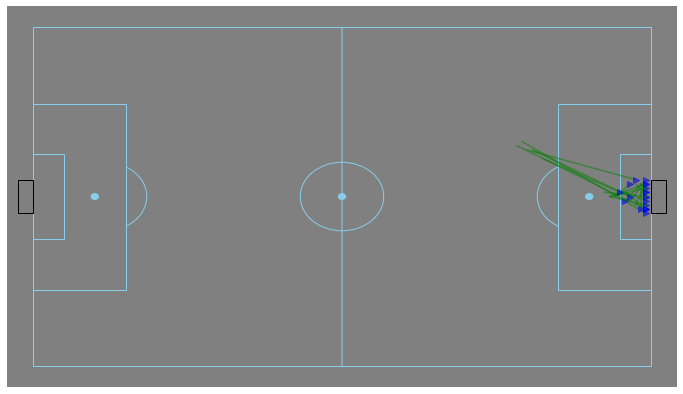

In [28]:
fig = plt.figure()
fig.set_size_inches(12, 7)
ax=fig.add_subplot(1, 1, 1)
draw_pitch(ax, 'grey', 'skyblue')
plt.ylim(-5, 85)
plt.xlim(-5, 125)
plt.axis('off')
for j in range(len(data)):
    plt.plot([int(data["XSTART"][j]),int(data["XEND"][j])],
             [int(data["YSTART"][j]),int(data["YEND"][j])],color='green',alpha=0.5)
    
    #plt.plot([int(data['XSTART'][j])],[int(data['YSTART'][j])],">",color="blue")
    plt.plot([int(data['XEND'][j])],[int(data['YEND'][j])],">",color="blue",alpha=0.5)
plt.show()
#plt.title("Aubameyang ShotMap",size=16)

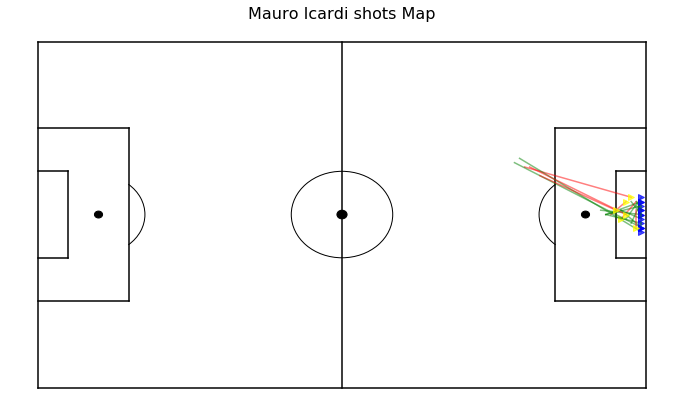

In [60]:
#Create figure
fig=plt.figure()
fig.set_size_inches(12, 7)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Pen Area
plt.plot([0,18],[20,20],color='black')
plt.plot([0,18],[60,60],color='black')
plt.plot([18,18],[20,60],color='black')

#Left 6-yard box
plt.plot([0,6],[30,30],color='black')
plt.plot([0,6],[50,50],color='black')
plt.plot([6,6],[30,50],color='black')


#Right Area Area
plt.plot([120,102],[20,20],color='black')
plt.plot([120,102],[60,60],color='black')
plt.plot([102,102],[20,60],color='black')

#Right 6-yard box
plt.plot([120,114],[30,30],color='black')
plt.plot([120,114],[50,50],color='black')
plt.plot([114,114],[30,50],color='black')

#Circles
centreCircle = plt.Circle([60,40],radius=10,fill=False)
centreSpot = plt.Circle([60,40],radius=1,color='black')
leftPenSpot = plt.Circle([12,40],radius=0.8,color='black')
rightPenSpot = plt.Circle([108,40],radius=0.8,color='black')



#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((12,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((108,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

for j in range(len(data)):
    if(data['Result'][j] == 'Goal'):
        plt.plot([int(data["XSTART"][j]),int(data["XEND"][j])],
             [int(data["YSTART"][j]),int(data["YEND"][j])],color='green',alpha=0.5)
    
    #plt.plot([int(data['XSTART'][j])],[int(data['YSTART'][j])],">",color="blue")
        plt.plot([int(data['XEND'][j])],[int(data['YEND'][j])],">",color="blue",alpha=0.7)
    elif(data['Result'][j] == 'Saved'):
        plt.plot([int(data["XSTART"][j]),int(data["XEND"][j])],
             [int(data["YSTART"][j]),int(data["YEND"][j])],color='red',alpha=0.5)
    
    #plt.plot([int(data['XSTART'][j])],[int(data['YSTART'][j])],">",color="blue")
        plt.plot([int(data['XEND'][j])],[int(data['YEND'][j])],">",color="yellow",alpha=0.7)

#Display Pitch
plt.title("Mauro Icardi shots Map",size=16)
#ax.legend(loc="upper left")
plt.show()


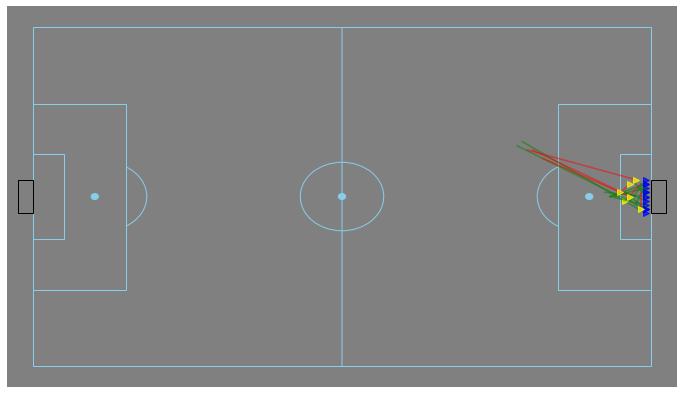

In [63]:
fig = plt.figure()
fig.set_size_inches(12, 7)
ax=fig.add_subplot(1, 1, 1)
draw_pitch(ax, 'grey', 'skyblue')
plt.ylim(-5, 85)
plt.xlim(-5, 125)
plt.axis('off')
for j in range(len(data)):
    if(data['Result'][j] == 'Goal'):
        plt.plot([int(data["XSTART"][j]),int(data["XEND"][j])],
             [int(data["YSTART"][j]),int(data["YEND"][j])],color='green',alpha=0.5)
    
    #plt.plot([int(data['XSTART'][j])],[int(data['YSTART'][j])],">",color="blue")
        plt.plot([int(data['XEND'][j])],[int(data['YEND'][j])],">",color="blue",alpha=0.7)
    elif(data['Result'][j] == 'Saved'):
        plt.plot([int(data["XSTART"][j]),int(data["XEND"][j])],
             [int(data["YSTART"][j]),int(data["YEND"][j])],color='red',alpha=0.5)
    
    #plt.plot([int(data['XSTART'][j])],[int(data['YSTART'][j])],">",color="blue")
        plt.plot([int(data['XEND'][j])],[int(data['YEND'][j])],">",color="yellow",alpha=0.7)
plt.show()